In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [2]:
# Correct Data Parsing
file_path = "winequality-red.csv"
data = pd.read_csv(file_path, delimiter=';')
data.rename(columns=lambda x: x.strip().lower(), inplace=True)


In [3]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Unsupervised Learning

KMeans Inertia: 396062.89117527066


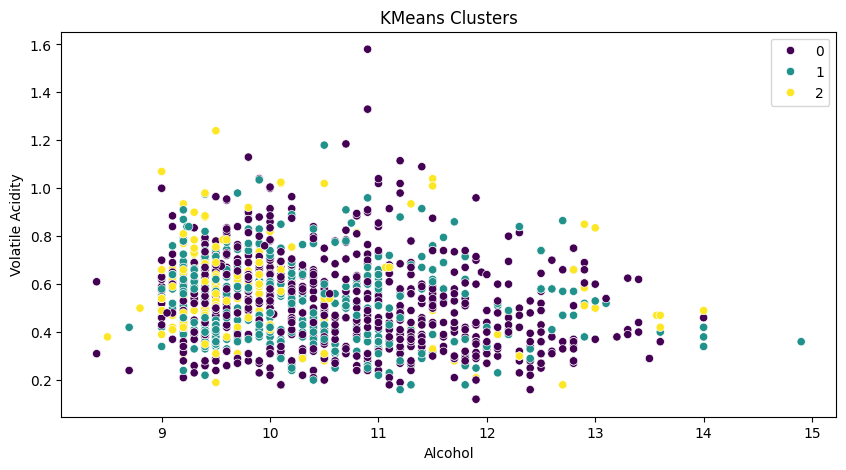

KMeans Silhouette Score: 0.5212410071380449
KMeans Davies-Bouldin Index: 0.6695416053358113
DBSCAN Silhouette Score: -0.5194462438150053


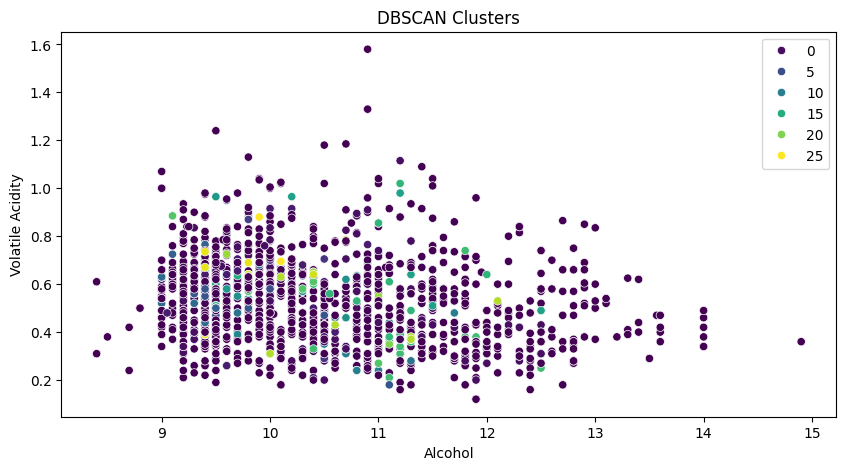

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data.drop(columns='quality'))
print("KMeans Inertia:", kmeans.inertia_)

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data.drop(columns='quality'))

# Visualize KMeans Clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['alcohol'], y=data['volatile acidity'], hue=kmeans_labels, palette='viridis')
plt.title("KMeans Clusters")
plt.xlabel("Alcohol")
plt.ylabel("Volatile Acidity")
plt.show()

# Clustering Validation for KMeans
kmeans_silhouette = silhouette_score(data.drop(columns='quality'), kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(data.drop(columns='quality'), kmeans_labels)

print("KMeans Silhouette Score:", kmeans_silhouette)
print("KMeans Davies-Bouldin Index:", kmeans_davies_bouldin)

# Clustering Validation for DBSCAN
unique_labels = set(dbscan_labels)
if len(unique_labels) > 1:  # Ensure at least two clusters
    dbscan_silhouette = silhouette_score(data.drop(columns='quality'), dbscan_labels)
    print("DBSCAN Silhouette Score:", dbscan_silhouette)
else:
    print("DBSCAN did not produce enough clusters for silhouette score calculation.")

# Optional: Visualize DBSCAN clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['alcohol'], y=data['volatile acidity'], hue=dbscan_labels, palette='viridis')
plt.title("DBSCAN Clusters")
plt.xlabel("Alcohol")
plt.ylabel("Volatile Acidity")
plt.show()


# Feature Selection

In [5]:

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=5)
selected_features = selector.fit_transform(data.drop(columns='quality'), data['quality'])
selected_columns = data.drop(columns='quality').columns[selector.get_support()]
print("Selected Features:", selected_columns)

# Train-test split with selected features
X_train, X_test, y_train, y_test = train_test_split(selected_features, data['quality'], test_size=0.3, random_state=42)

# Feature Engineering
data['acidity_to_sugar'] = data['fixed acidity'] / (data['residual sugar'] + 1)
data['density_to_alcohol'] = data['density'] / (data['alcohol'] + 1)


Selected Features: Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')


# Supervised Learning

In [6]:
# Define classifiers
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=500),
    'SVM': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Dictionary to store results
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Classification Report': classification_report(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    print(f"\n{name} Results:")
    print("Accuracy:", results[name]['Accuracy'])
    print("Precision:", results[name]['Precision'])
    print("Recall:", results[name]['Recall'])
    print("F1 Score:", results[name]['F1 Score'])
    print("Confusion Matrix:\n", results[name]['Confusion Matrix'])

# Save the trained Random Forest model
joblib.dump(models['Random Forest'], 'random_forest_model.pkl')
print("\nRandom Forest model saved successfully.")

c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Random Forest Results:
Accuracy: 0.6520833333333333
Precision: 0.6258980244113739
Recall: 0.6520833333333333
F1 Score: 0.6362082216815422
Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   0   9   8   0   0]
 [  0   1 147  45   2   0]
 [  0   0  47 137  16   0]
 [  0   0   2  30  28   1]
 [  0   0   0   2   3   1]]

Gradient Boosting Results:
Accuracy: 0.6020833333333333
Precision: 0.593910760797616
Recall: 0.6020833333333333
F1 Score: 0.5930381001261402
Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   2  10   5   0   0]
 [  2   2 142  47   2   0]
 [  2   2  58 123  13   2]
 [  0   0   0  38  21   2]
 [  0   0   0   1   4   1]]

Logistic Regression Results:
Accuracy: 0.5604166666666667
Precision: 0.5240016184884071
Recall: 0.5604166666666667
F1 Score: 0.5259904075229573
Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   0  11   6   0   0]
 [  0   0 148  47   0   0]
 [  0   0  81 112   7   0]
 [  0   0   5  47   9   0]
 [  0   0   0   4   2   0]]


c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.p


SVM Results:
Accuracy: 0.5041666666666667
Precision: 0.5802867527152402
Recall: 0.5041666666666667
F1 Score: 0.4457474960771999
Confusion Matrix:
 [[  0   0   0   1   0   0]
 [  0   0   2  15   0   0]
 [  0   0  75 120   0   0]
 [  0   0  34 166   0   0]
 [  0   0   4  56   1   0]
 [  0   0   1   5   0   0]]

K-Nearest Neighbors Results:
Accuracy: 0.5125
Precision: 0.4924836594304757
Recall: 0.5125
F1 Score: 0.4894021517393078
Confusion Matrix:
 [[  0   0   1   0   0   0]
 [  0   1   5  11   0   0]
 [  0   0 133  57   5   0]
 [  0   0  87 101  12   0]
 [  0   1   9  40  11   0]
 [  0   0   0   5   1   0]]

Random Forest model saved successfully.


c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

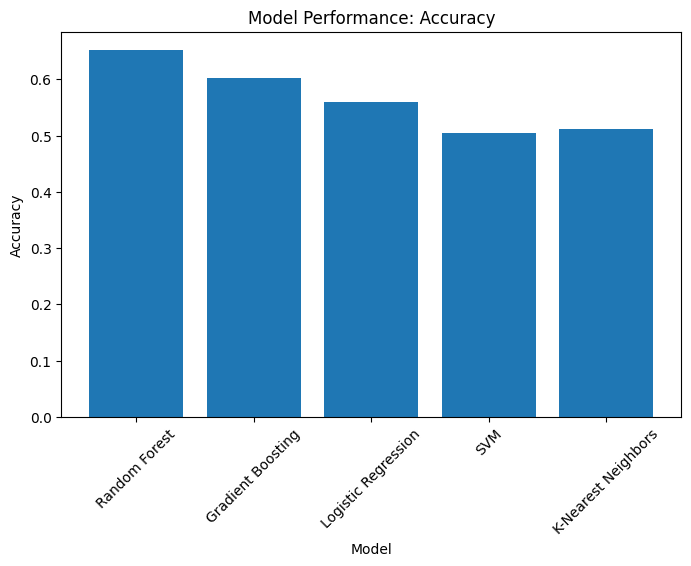

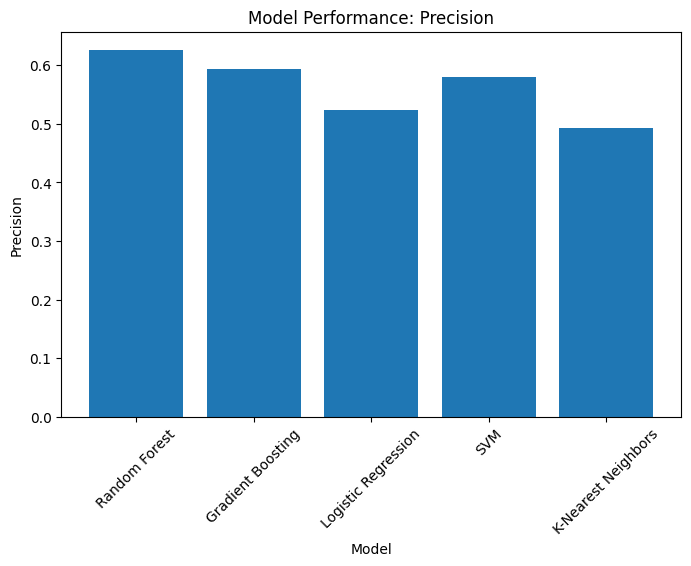

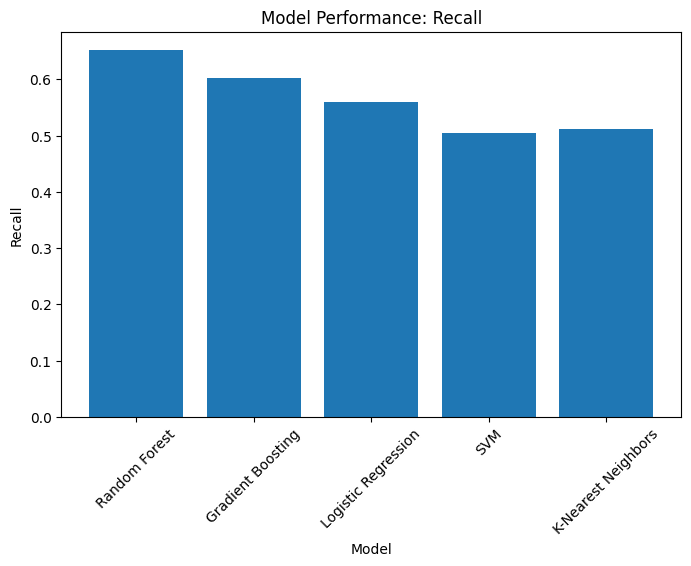

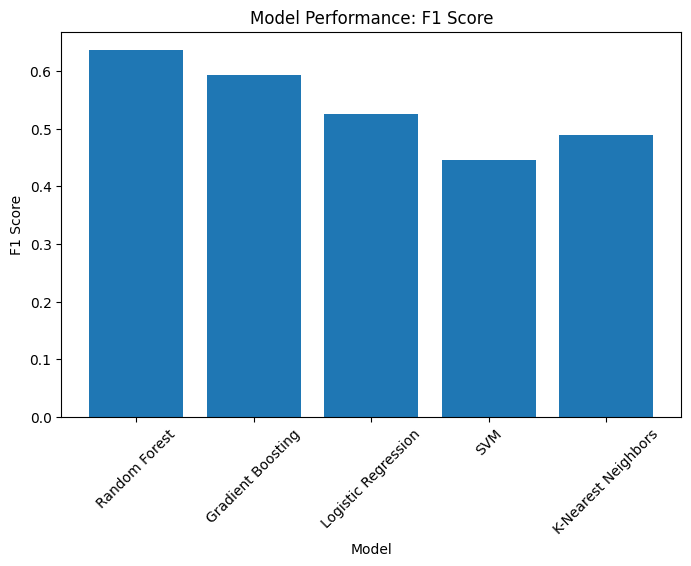

In [7]:
# Visualize performance
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.figure(figsize=(8, 5))
    plt.bar(results.keys(), [results[model][metric] for model in results])
    plt.title(f'Model Performance: {metric}')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.show()

# Manual Feature Engineering

In [8]:
# Manual Feature Extraction on a new dataset
# Load second dataset
data2 = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'output': np.random.choice([0, 1], 100)
})

# Create manual features
data2['feature3'] = data2['feature1'] * data2['feature2']
data2['feature4'] = data2['feature1'] + data2['feature2']

X2 = data2.drop(columns='output')
y2 = data2['output']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

rf_manual = RandomForestClassifier(random_state=42)
rf_manual.fit(X2_train, y2_train)
y2_pred = rf_manual.predict(X2_test)
print("Manual Feature Extraction Results:")
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred))


Manual Feature Extraction Results:
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.50      0.55        18
           1       0.40      0.50      0.44        12

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.52      0.50      0.51        30



# PCA

In [9]:
# Automated Feature Extraction with PCA
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X2)
X2_pca_train, X2_pca_test, y2_pca_train, y2_pca_test = train_test_split(X2_pca, y2, test_size=0.3, random_state=42)

rf_pca = RandomForestClassifier(random_state=42)
rf_pca.fit(X2_pca_train, y2_pca_train)
y2_pca_pred = rf_pca.predict(X2_pca_test)
print("PCA-based Feature Extraction Results:")
print("Accuracy:", accuracy_score(y2_pca_test, y2_pca_pred))
print("Classification Report:\n", classification_report(y2_pca_test, y2_pca_pred))

PCA-based Feature Extraction Results:
Accuracy: 0.4666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.39      0.47        18
           1       0.39      0.58      0.47        12

    accuracy                           0.47        30
   macro avg       0.49      0.49      0.47        30
weighted avg       0.51      0.47      0.47        30

